Analyzing file 1 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_1.wav
Analyzing file 2 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_10.wav
Analyzing file 3 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_11.wav
Analyzing file 4 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_12.wav
Analyzing file 5 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_13.wav
Analyzing file 6 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_14.wav
Analyzing file 7 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_15.wav
Analyzing file 8 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_16.wav
Analyzing file 9 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_17.wav
Analyzing file 10 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_18.wav
Analyzing file 11 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_19.wav
Analyzing file 12 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_2.wav
Analyzing file 13 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_20.wav
Analyzing 

e:\Python\Lib\site-packages\pyAudioAnalysis\audioBasicIO.py:99: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, signal = wavfile.read(input_file) # from scipy.io


Analyzing file 18 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_25.wav
Analyzing file 19 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_26.wav
Analyzing file 20 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_27.wav
Analyzing file 21 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_28.wav
Analyzing file 22 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_29.wav
Analyzing file 23 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_3.wav
Analyzing file 24 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_30.wav
Analyzing file 25 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_4.wav
Analyzing file 26 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_5.wav
Analyzing file 27 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_6.wav
Analyzing file 28 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_7.wav
Analyzing file 29 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_8.wav
Analyzing file 30 of 30: E:/Files\Acoustic Data\Ruminating\Ruminating_9.wav
Featur

e:\Python\Lib\site-packages\pyAudioAnalysis\audioBasicIO.py:99: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, signal = wavfile.read(input_file) # from scipy.io


[0. 1.] 0.0
[1. 4.] 1.0
[4. 5.] 2.0
[5.  6.5] 0.0
[6.5 7.5] 2.0
[7.5 8. ] 0.0
[8.  8.5] 2.0
[8.5 9. ] 0.0
[ 9.  11.5] 2.0
[11.5 12.5] 0.0
[12.5 14.5] 2.0
[14.5 15.5] 0.0
[15.5 17. ] 2.0
[17. 18.] 0.0
[18.  19.5] 2.0
[19.5 20. ] 0.0
[20. 22.] 2.0
[22. 23.] 0.0
[23.  23.5] 1.0
[23.5 25. ] 2.0
[25.  26.5] 0.0
[26.5 28. ] 2.0
[28. 29.] 0.0
[29.  30.5] 2.0
[30.5 32.5] 0.0
[32.5 34. ] 2.0
[34.  35.5] 0.0
[35.5 36.5] 2.0
[36.5 37.5] 0.0
[37.5 39. ] 2.0
[39.  40.5] 0.0
[40.5 42. ] 2.0
[42. 43.] 0.0
[43. 44.] 2.0
[44.  46.5] 0.0
[46.5 47. ] 2.0
[47.  48.5] 0.0
[48.5 50. ] 2.0
[50.  50.5] 0.0
[50.5 52.5] 2.0
[52.5 53. ] 0.0
[53. 55.] 2.0
[55.  55.5] 0.0
[55.5 57. ] 2.0
[57. 58.] 0.0
[58.  59.5] 2.0
[59.5 60.5] 0.0
[60.5 62. ] 2.0
[62.  62.5] 0.0
[62.5 64. ] 2.0
[64. 65.] 0.0
[65.  66.5] 2.0
[66.5 67. ] 0.0
[67.  67.5] 1.0
[67.5 68. ] 0.0
[68. 70.] 2.0
[70. 72.] 0.0
[72.  73.5] 1.0
[73.5 76.5] 0.0
[76.5 78. ] 2.0
[78.  79.5] 0.0
[79.5 81. ] 2.0
[81.  81.5] 0.0
[81.5 84.5] 2.0
[84.5 85. ] 0.0
[85.

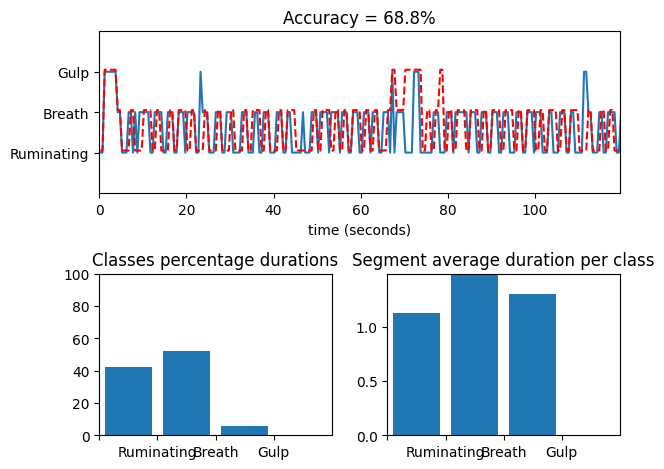

Overall Accuracy: 0.69

Segments:
segment 0 0.0 sec - 1.0 sec: Ruminating
segment 1 1.0 sec - 4.0 sec: Gulp
segment 2 4.0 sec - 5.0 sec: Breath
segment 3 5.0 sec - 6.5 sec: Ruminating
segment 4 6.5 sec - 7.5 sec: Breath
segment 5 7.5 sec - 8.0 sec: Ruminating
segment 6 8.0 sec - 8.5 sec: Breath
segment 7 8.5 sec - 9.0 sec: Ruminating
segment 8 9.0 sec - 11.5 sec: Breath
segment 9 11.5 sec - 12.5 sec: Ruminating
segment 10 12.5 sec - 14.5 sec: Breath
segment 11 14.5 sec - 15.5 sec: Ruminating
segment 12 15.5 sec - 17.0 sec: Breath
segment 13 17.0 sec - 18.0 sec: Ruminating
segment 14 18.0 sec - 19.5 sec: Breath
segment 15 19.5 sec - 20.0 sec: Ruminating
segment 16 20.0 sec - 22.0 sec: Breath
segment 17 22.0 sec - 23.0 sec: Ruminating
segment 18 23.0 sec - 23.5 sec: Gulp
segment 19 23.5 sec - 25.0 sec: Breath
segment 20 25.0 sec - 26.5 sec: Ruminating
segment 21 26.5 sec - 28.0 sec: Breath
segment 22 28.0 sec - 29.0 sec: Ruminating
segment 23 29.0 sec - 30.5 sec: Breath
segment 24 30.5 s

In [3]:
from pyAudioAnalysis.audioTrainTest import extract_features_and_train
from pyAudioAnalysis.audioSegmentation import mid_term_file_classification, labels_to_segments
from pyAudioAnalysis.audioTrainTest import load_model
import os
mt_win, mt_step, s_win, s_step = 1, 0.5, 0.1, 0.05
dirs = [os.path.join('E:/Files','Acoustic Data', 'Ruminating'), os.path.join('E:/Files','Acoustic Data', 'Gulp'),os.path.join('E:/Files','Acoustic Data', 'Breath')] 
extract_features_and_train(dirs, mt_win, mt_step, s_win, s_step, "svm_rbf", "svm_Ruminating_Gulp_Breath")

labels, class_names, _, _ = mid_term_file_classification(os.path.join('E:/Files','Acoustic Data', 'Test','2min_new.wav'), 
                                                         "svm_Ruminating_Gulp_Breath", "svm_rbf",  True, 
                                                        os.path.join('E:/Files','Acoustic Data', 'Test','2min_new.segments'))
#print("\nFix-sized segments:")
#for il, l in enumerate(labels):
#    print(f'fix-sized segment {il}: {class_names[int(l)]}')

# load the parameters of the model (actually we just want the mt_step here):    
cl, m, s, m_classes, mt_win, mt_step, s_win, s_step, c_beat = load_model("svm_Ruminating_Gulp_Breath")

# print "merged" segments (use labels_to_segments())
print("\nSegments:")
segs, c = labels_to_segments(labels, mt_step)
for iS, seg in enumerate(segs):
    print(f'segment {iS} {seg[0]} sec - {seg[1]} sec: {class_names[int(c[iS])]}')

In [4]:
from pyAudioAnalysis.audioTrainTest import extract_features_and_train
help(extract_features_and_train)

Help on function extract_features_and_train in module pyAudioAnalysis.audioTrainTest:

extract_features_and_train(paths, mid_window, mid_step, short_window, short_step, classifier_type, model_name, compute_beat=False, train_percentage=0.9, dict_of_ids=None, use_smote=False)
    This function is used as a wrapper to segment-based audio feature extraction
    and classifier training.
    ARGUMENTS:
        paths:                      list of paths of directories. Each directory
                                    contains a signle audio class whose samples
                                    are stored in seperate WAV files.
        mid_window, mid_step:       mid-term window length and step
        short_window, short_step:   short-term window and step
        classifier_type:            "svm" or "knn" or "randomforest" or
                                    "gradientboosting" or "extratrees"
        model_name:                 name of the model to be saved
        dict_of_ids:         

In [1]:
from pyAudioAnalysis import audioTrainTest as aT
import os
files_to_test_path = os.path.join('E:/Files','Acoustic Data', 'Test', '1min_parts')
files_to_test = [os.path.join(files_to_test_path, file) for file in os.listdir(files_to_test_path) if file.endswith(".wav")]
for f in files_to_test:
    print(f'{f}:')
    c, p, p_nam = aT.file_classification(f, "svm_Ruminating_Gulp_Breath","svm_rbf")
    print(f'P({p_nam[0]}={p[0]})')
    print(f'P({p_nam[1]}={p[1]})')
    print(f'P({p_nam[2]}={p[2]})')
    print()

e:\Python\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


e:\Files\Github\Cow-Audio-Detection\pyAudioAnalysis\audioBasicIO.py:99: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, signal = wavfile.read(input_file) # from scipy.io


[0. 1.] 0.0
[1. 4.] 1.0
[4. 6.] 2.0
[6. 7.] 0.0
[7. 9.] 2.0
[ 9. 10.] 0.0
[10. 12.] 2.0
[12. 13.] 0.0
[13. 15.] 2.0
[15. 16.] 0.0
[16. 17.] 2.0
[17. 18.] 0.0
[18. 22.] 2.0
[22. 24.] 0.0
[24. 25.] 2.0
[25. 27.] 0.0
[27. 28.] 2.0
[28. 29.] 0.0
[29. 31.] 2.0
[31. 33.] 0.0
[33. 34.] 2.0
[34. 36.] 0.0
[36. 37.] 2.0
[37. 38.] 0.0
[38. 40.] 2.0
[40. 41.] 0.0
[41. 42.] 2.0
[42. 43.] 0.0
[43. 45.] 2.0
[45. 47.] 0.0
[47. 48.] 1.0
[48. 49.] 0.0
[49. 50.] 2.0
[50. 51.] 1.0
[51. 55.] 2.0
[55. 56.] 0.0
[56. 60.] 2.0
[60. 61.] 0.0
[61. 62.] 2.0
[62. 63.] 0.0
[63. 64.] 2.0
[64. 65.] 1.0
[65. 67.] 2.0
[67. 68.] 1.0
[68. 70.] 2.0
[70. 72.] 0.0
[72. 74.] 1.0
[74. 75.] 0.0
[75. 76.] 2.0
[76. 77.] 0.0
[77. 78.] 2.0
[78. 80.] 0.0
[80. 81.] 2.0
[81. 82.] 0.0
[82. 87.] 2.0
[87. 88.] 0.0
[88. 89.] 2.0
[89. 90.] 0.0
[90. 92.] 2.0
[92. 93.] 0.0
[93. 94.] 2.0
[94. 95.] 0.0
[95. 96.] 1.0
[96. 97.] 2.0
[97. 98.] 0.0
[ 98. 100.] 2.0
[100. 101.] 0.0
[101. 102.] 2.0
[102. 103.] 0.0
[103. 105.] 2.0
[105. 106.] 0.0
[106

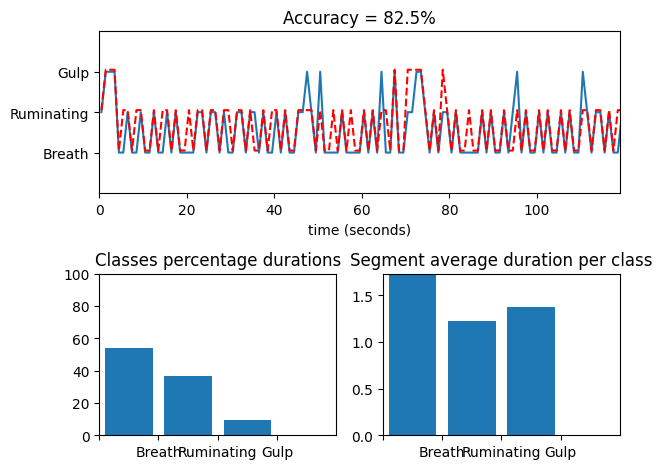

Overall Accuracy: 0.82

Segments:
segment 0 0.0 sec - 1.0 sec: Ruminating
segment 1 1.0 sec - 4.0 sec: Gulp
segment 2 4.0 sec - 6.0 sec: Breath
segment 3 6.0 sec - 7.0 sec: Ruminating
segment 4 7.0 sec - 9.0 sec: Breath
segment 5 9.0 sec - 10.0 sec: Ruminating
segment 6 10.0 sec - 12.0 sec: Breath
segment 7 12.0 sec - 13.0 sec: Ruminating
segment 8 13.0 sec - 15.0 sec: Breath
segment 9 15.0 sec - 16.0 sec: Ruminating
segment 10 16.0 sec - 17.0 sec: Breath
segment 11 17.0 sec - 18.0 sec: Ruminating
segment 12 18.0 sec - 22.0 sec: Breath
segment 13 22.0 sec - 24.0 sec: Ruminating
segment 14 24.0 sec - 25.0 sec: Breath
segment 15 25.0 sec - 27.0 sec: Ruminating
segment 16 27.0 sec - 28.0 sec: Breath
segment 17 28.0 sec - 29.0 sec: Ruminating
segment 18 29.0 sec - 31.0 sec: Breath
segment 19 31.0 sec - 33.0 sec: Ruminating
segment 20 33.0 sec - 34.0 sec: Breath
segment 21 34.0 sec - 36.0 sec: Ruminating
segment 22 36.0 sec - 37.0 sec: Breath
segment 23 37.0 sec - 38.0 sec: Ruminating
segme

In [5]:
from pyAudioAnalysis.audioSegmentation import mid_term_file_classification, labels_to_segments
from pyAudioAnalysis.audioTrainTest import load_model
import os
labels, class_names, _, _ = mid_term_file_classification(os.path.join('E:/Files','Acoustic Data', 'Test','2min_new.wav'), 
                                                         "svm_Ruminating_Gulp_Breath", "svm_rbf",  True, 
                                                        os.path.join('E:/Files','Acoustic Data', 'Test','2min_new.segments'))
#print("\nFix-sized segments:")
#for il, l in enumerate(labels):
#    print(f'fix-sized segment {il}: {class_names[int(l)]}')

# load the parameters of the model (actually we just want the mt_step here):    
cl, m, s, m_classes, mt_win, mt_step, s_win, s_step, c_beat = load_model("svm_Ruminating_Gulp_Breath")

# print "merged" segments (use labels_to_segments())
print("\nSegments:")
segs, c = labels_to_segments(labels, mt_step)
for iS, seg in enumerate(segs):
    print(f'segment {iS} {seg[0]} sec - {seg[1]} sec: {class_names[int(c[iS])]}')

In [20]:
from pyAudioAnalysis import ShortTermFeatures as aF
from pyAudioAnalysis import audioBasicIO as aIO 
import numpy as np 
import plotly.graph_objs as go 
import matplotlib.pyplot as plt
import plotly
import IPython
import os
from plotly.subplots import make_subplots
#频谱中心点短期特征提取
#read audio data from file 
fs, s = aIO .read_audio_file(os.path.join('E:/Files','Acoustic Data', '0.3Eru_0.85Gul_1.15Gra_2.45Rum_4.1Moo_4.7Bre.wav'))

#play the initial and the generated files in notebook:
#IPython.display.display(IPython.display.Audio(os.path.join('E:/Files','Acoustic Data', 'Test','part_audio_052.wav')))

# print duration in seconds:
print(len(s),float(fs))
duration = len(s) / float(fs)
print(f'duration = {duration} seconds')

# extract short-term features using a 50msec non-overlapping windows
win, step = 0.050, 0.050 #windows 0.05, step 0.05
[f, fn] = aF.feature_extraction(s, fs, int(fs * win), int(fs * step))#f(特征提取的结果);fn(包含特征的名称或标签的列表)
'''
print(f'{f.shape[1]} frames, {f.shape[0]} short-term features') #帧数和特征数
print('Feature names:')
for i, nam in enumerate(fn):
    print(f'{i}:{nam}')
'''
# create time axis in seconds
time = np.arange(0, duration - step, win) 
# get the feature whose name is 'energy'
fig = make_subplots(rows=2, cols=1, shared_xaxes=True)
energy_zcr, energy_mfcc = f[fn.index('zcr'), :], f[fn.index('mfcc_1'), :]
traces = [(energy_zcr, "zcr", 1),(energy_mfcc, "mfcc_1", 2)]
for energy, name, row in traces:
    fig.add_trace(go.Scatter(x=time, y=energy, name=name), row=row, col=1)
    fig.update_yaxes(title_text=name, row=row, col=1)

fig.update_xaxes(title_text="time (sec)", row=2, col=1)
plotly.offline.iplot(fig)

'''
mfcc_features = f[8:21]
mfcc_layout = go.Layout(title='MFCC Heatmap', yaxis=dict(title='MFCC Coefficient'), xaxis=dict(title='Frame Index'))
plotly.offline.iplot(go.Figure(data=[go.Heatmap(z=mfcc_features, colorscale='Viridis')], layout=mfcc_layout))
'''
'''
fig = make_subplots(rows=13, cols=1, shared_xaxes=True, vertical_spacing=0.05)
for i in range(13):
    energy_mfcc = f[fn.index(f'mfcc_{i+1}'), :]
    fig.add_trace(go.Scatter(x=time, y=energy_mfcc, name=f"mfcc_{i+1}"), row=i+1, col=1)
    fig.update_yaxes(title_text=f"mfcc_{i+1}", row=i+1, col=1)

fig.update_xaxes(title_text="time (sec)")
fig.update_layout(title="MFCC Features vs Time", height=2000)
plotly.offline.iplot(fig)
'''


37627 8000.0
duration = 4.703375 seconds


'\nfig = make_subplots(rows=13, cols=1, shared_xaxes=True, vertical_spacing=0.05)\nfor i in range(13):\n    energy_mfcc = f[fn.index(f\'mfcc_{i+1}\'), :]\n    fig.add_trace(go.Scatter(x=time, y=energy_mfcc, name=f"mfcc_{i+1}"), row=i+1, col=1)\n    fig.update_yaxes(title_text=f"mfcc_{i+1}", row=i+1, col=1)\n\nfig.update_xaxes(title_text="time (sec)")\nfig.update_layout(title="MFCC Features vs Time", height=2000)\nplotly.offline.iplot(fig)\n'

e:\Files\Github\Cow-Audio-Detection\pyAudioAnalysis\audioBasicIO.py:99: WavFileWarning:

Chunk (non-data) not understood, skipping it.



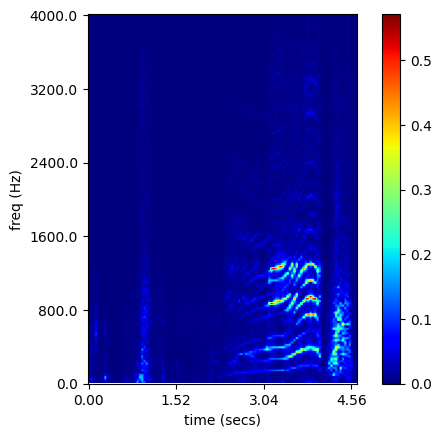

e:\Files\Github\Cow-Audio-Detection\pyAudioAnalysis\audioBasicIO.py:99: WavFileWarning:

Chunk (non-data) not understood, skipping it.



(117, 160)


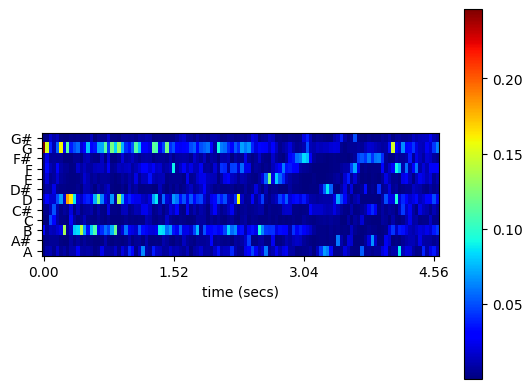

In [24]:
from pyAudioAnalysis import audioAnalysis
import os 

fS = audioAnalysis.fileSpectrogramWrapper # Spectrogram (频谱图)
fC = audioAnalysis.fileChromagramWrapper # Chromagram (色度图)
Audio_path = os.path.join('E:/Files','Acoustic Data', '0.3Eru_0.85Gul_1.15Gra_2.45Rum_4.1Moo_4.7Bre.wav')
fS(Audio_path)
fC(Audio_path)

In [2]:
import os, sklearn.cluster
from pyAudioAnalysis.MidTermFeatures import mid_feature_extraction as mT
from pyAudioAnalysis.audioBasicIO import read_audio_file, stereo_to_mono
from pyAudioAnalysis.audioSegmentation import labels_to_segments
#from pyAudioAnalysis.audioTrainTest import normalize_features
import numpy as np
import scipy.io.wavfile as wavfile
import IPython

# read signal and get normalized segment feature statistics:
input_file = os.path.join('E:/Files','Acoustic Data', '0.3Eru_0.85Gul_1.15Gra_2.45Rum_4.1Moo_4.7Bre.wav')
fs, x = read_audio_file(input_file) #fs采样频率，x波形数据
mt_size, mt_step, st_win = 5, 0.5, 0.1
[mt_feats, st_feats, _] = mT(x, fs, mt_size * fs, mt_step * fs,
                            round(fs * st_win), round(fs * st_win * 0.5))
print(mt_feats)
#(mt_feats_norm, MEAN, STD) = normalize_features([mt_feats.T])
mt_feats = mt_feats.T

# perform clustering
n_clusters = 5
x_clusters = [np.zeros((fs, )) for i in range(n_clusters)]
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(mt_feats)
cls = k_means.labels_

# save clusters to concatenated wav files
segs, c = labels_to_segments(cls, mt_step)  # convert flags to segment limits
for sp in range(n_clusters):                
    count_cl = 0
    for i in range(len(c)):     # for each segment in each cluster (>2 secs long)
        if c[i] == sp and segs[i, 1]-segs[i, 0] > 2:
            count_cl += 1
            # get the signal and append it to the cluster's signal (followed by some silence)
            cur_x = x[int(segs[i, 0] * fs): int(segs[i, 1] * fs)]
            x_clusters[sp] = np.append(x_clusters[sp], cur_x)
            x_clusters[sp] = np.append(x_clusters[sp], np.zeros((fs,)))
    # write cluster's signal into a WAV file
    print(f'cluster {sp}: {count_cl} segments {len(x_clusters[sp])/float(fs)} sec total dur')        
    wavfile.write(f'cluster_{sp}.wav', fs, np.int16(x_clusters[sp]))
    IPython.display.display(IPython.display.Audio(f'cluster_{sp}.wav'))

e:\Files\Github\Cow-Audio-Detection\pyAudioAnalysis\audioBasicIO.py:99: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, signal = wavfile.read(input_file) # from scipy.io
e:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[0.15703271 0.16696927 0.17489074 ... 0.21431551 0.21982023 0.21151439]
 [0.10029402 0.11358913 0.12884366 ... 0.35244346 0.43640825 0.2540152 ]
 [2.96855358 3.08631741 3.12721369 ... 3.26170306 3.26644781 2.83169152]
 ...
 [0.02720572 0.02698528 0.02134239 ... 0.00565571 0.00554877 0.        ]
 [0.00958888 0.01018289 0.01087512 ... 0.00703151 0.00548489 0.        ]
 [0.01558886 0.01203902 0.00877119 ... 0.00456656 0.00517207 0.        ]]
cluster 0: 0 segments 1.0 sec total dur


cluster 1: 0 segments 1.0 sec total dur


cluster 2: 0 segments 1.0 sec total dur


cluster 3: 0 segments 1.0 sec total dur


cluster 4: 0 segments 1.0 sec total dur
